## Here we'll be making the Fe II templates that the spectral decomposition will use. We take a single Fe II template and convolve it with gaussians of many different widths to create many Fe II templates. The spectral decomposition will fit over a width parameter that selects the width of the gaussian. Use interpolation for widths in between existing templates. The spectral decomposition will also be allowed to fit for a scale factor for the Fe II template

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from astropy.io import fits
import os
import glob
from pylab import rcParams
rcParams['figure.figsize'] = 15,8

from astropy.convolution import Gaussian1DKernel
from astropy.convolution import convolve

In [3]:
data=np.loadtxt('./files/fe_optical.txt')
print(data.shape)
print(data[0:3,:])

wave=10**(data[:,0])
tmp=data[:,1]*10**15

def norm(flux):
    '''
    maps vector onto [0-1]
    '''
    return (flux-min(flux))/(max(flux)-min(flux))

# normalize the flux 
flux=norm(tmp)

(2000, 2)
[[3.5665140e+00 2.6987280e-16]
 [3.5666679e+00 1.9891820e-16]
 [3.5668218e+00 1.1496700e-16]]


In [4]:
print(min(wave))

3685.6492279033864


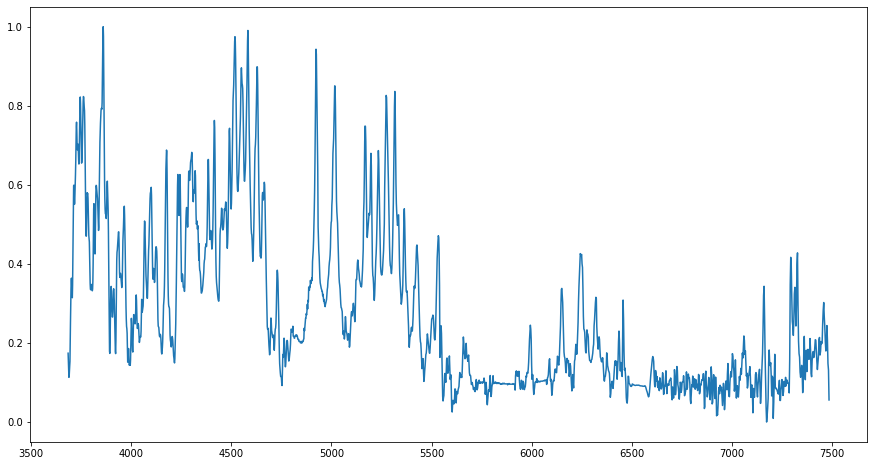

In [5]:
plt.plot(wave,flux)

In [6]:
vmax=1500 #km/s
rest_wl=4861
c=2.99e5 #km/s

#v/c=delta_wl/rest_wl

delta_lambda=rest_wl*vmax/c
print(delta_lambda)

24.38628762541806


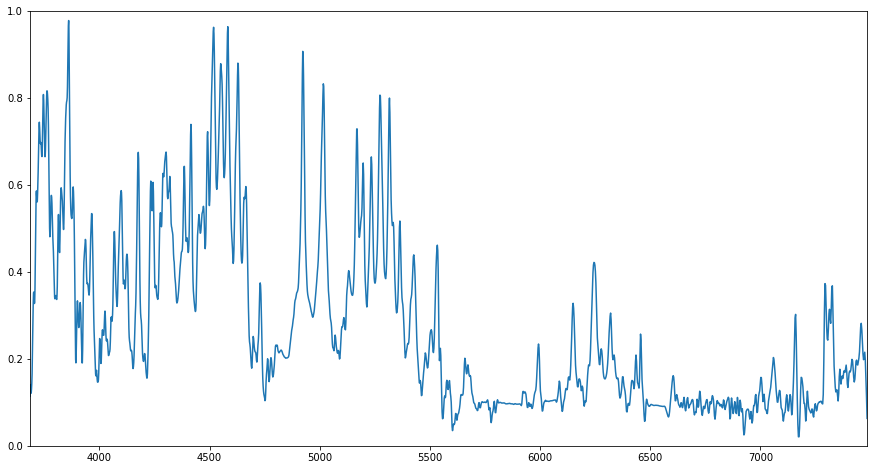

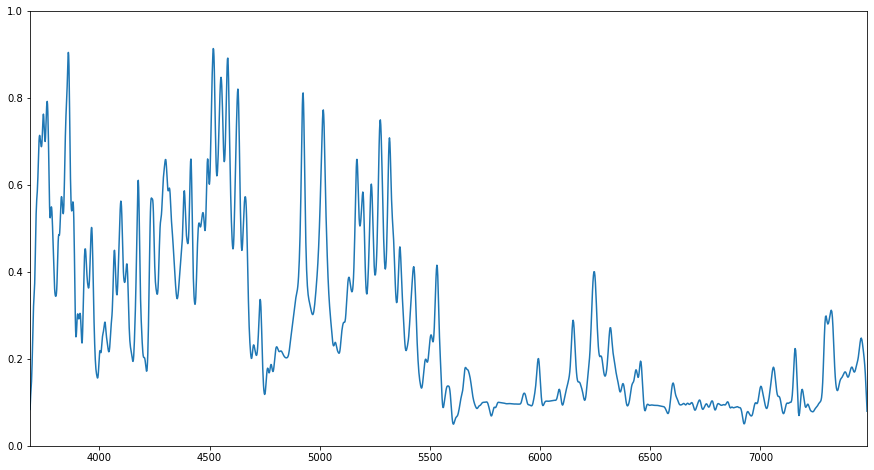

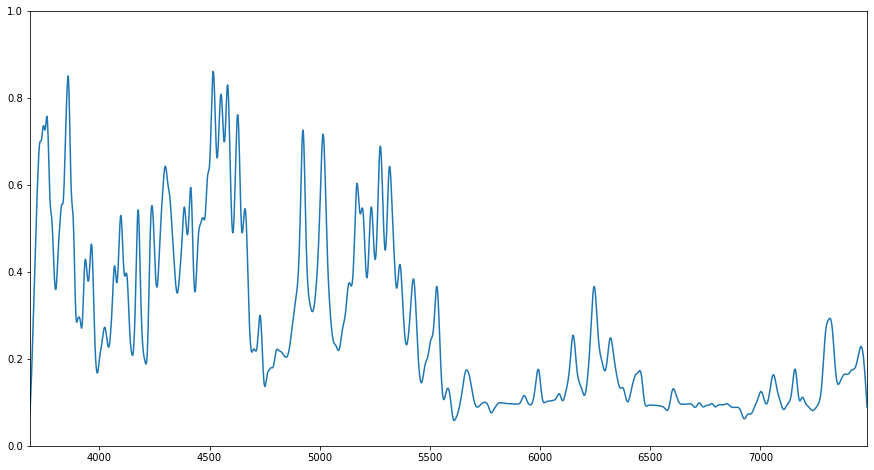

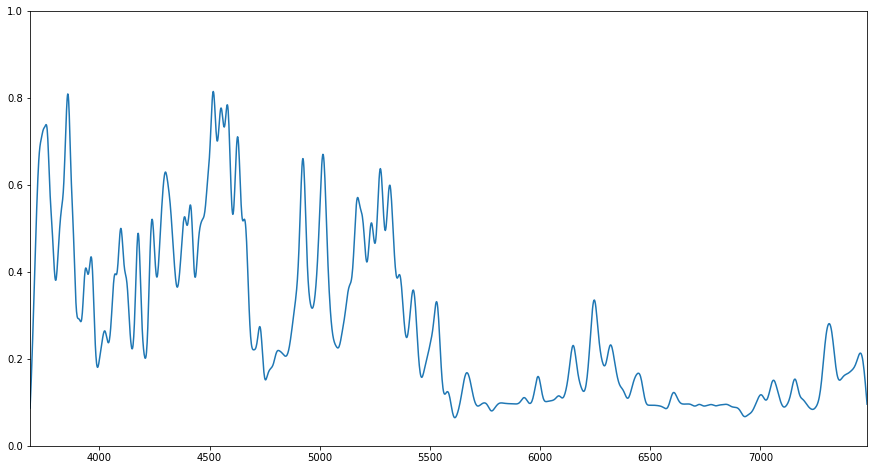

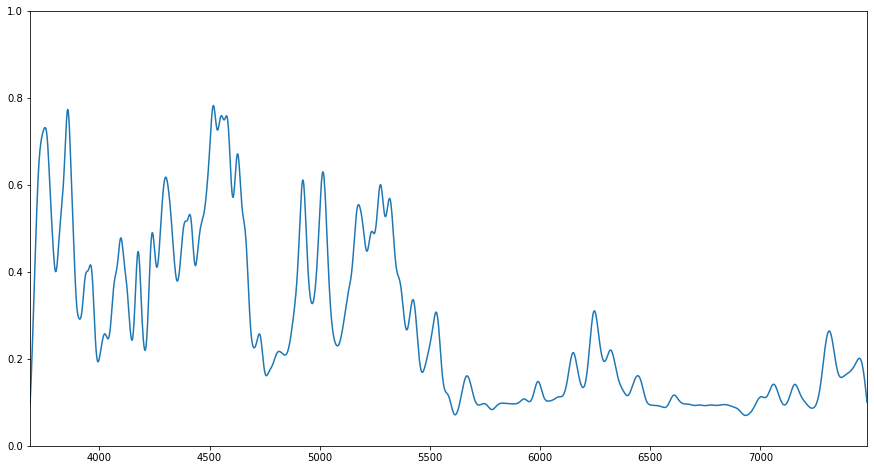

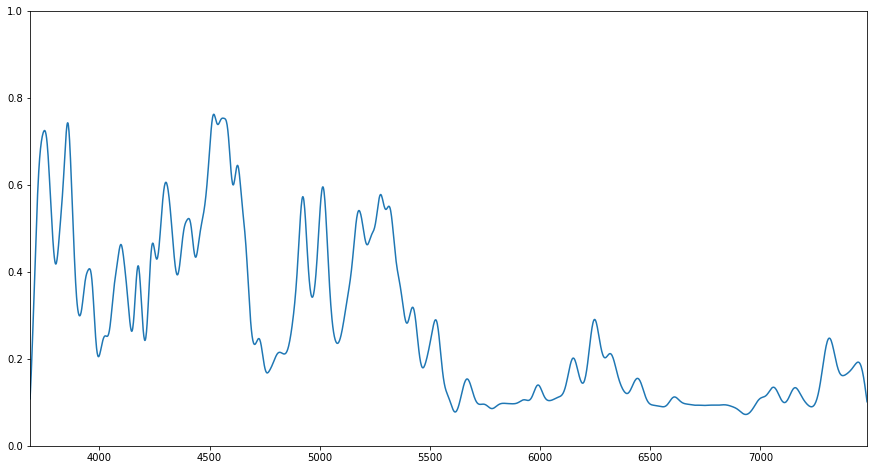

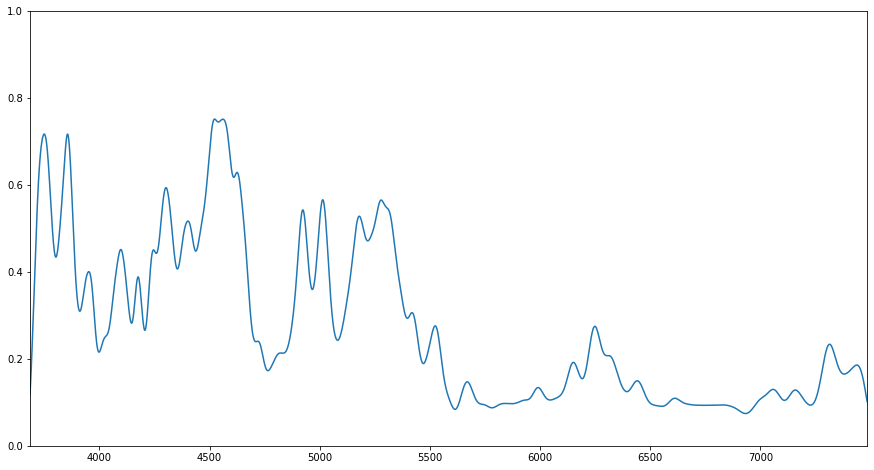

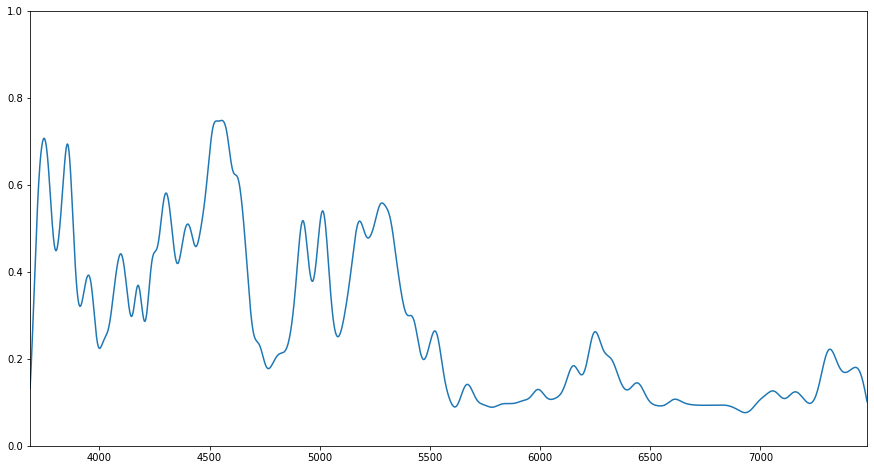

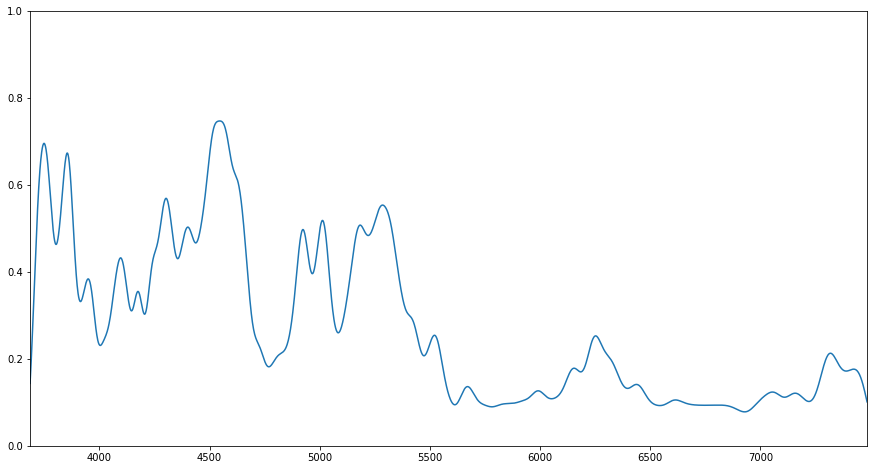

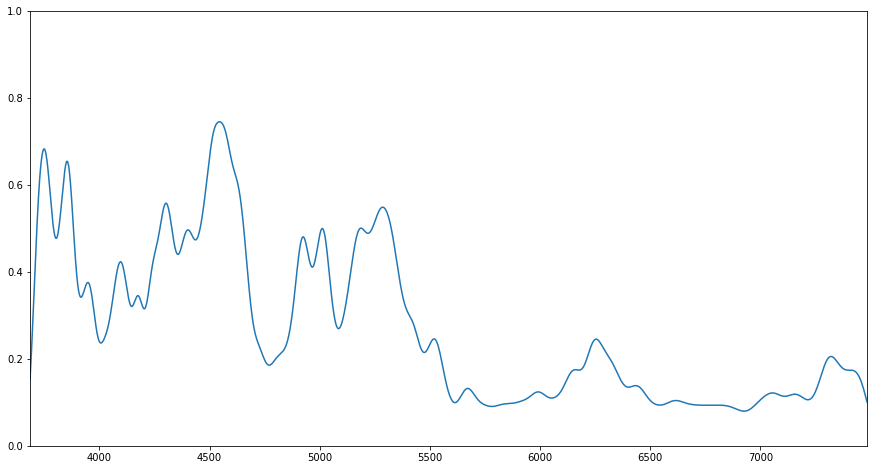

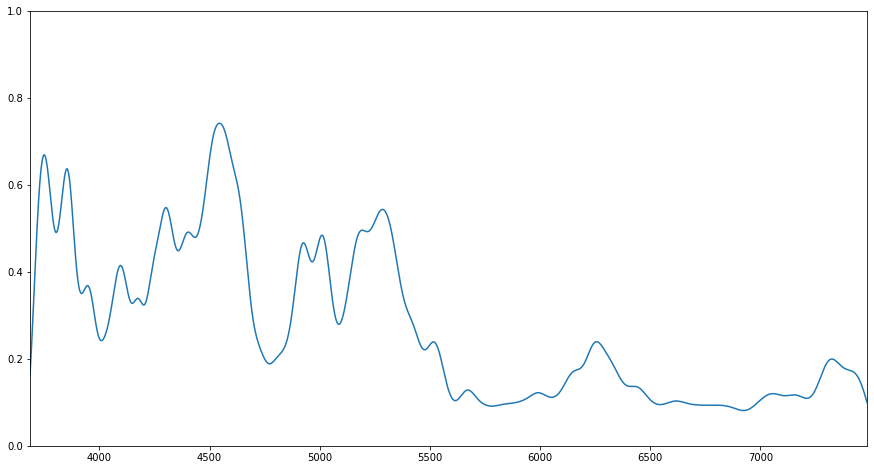

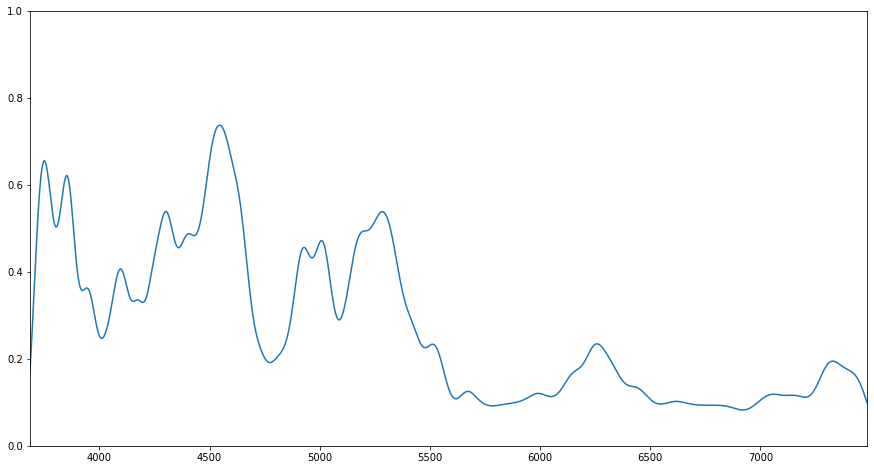

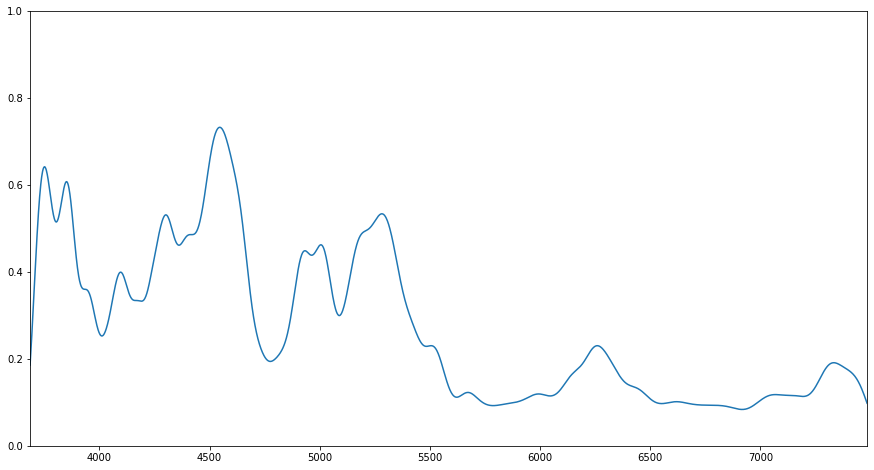

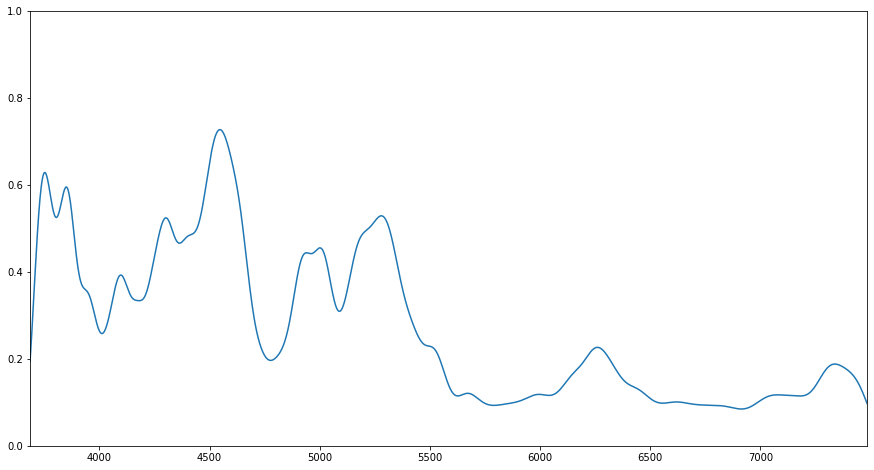

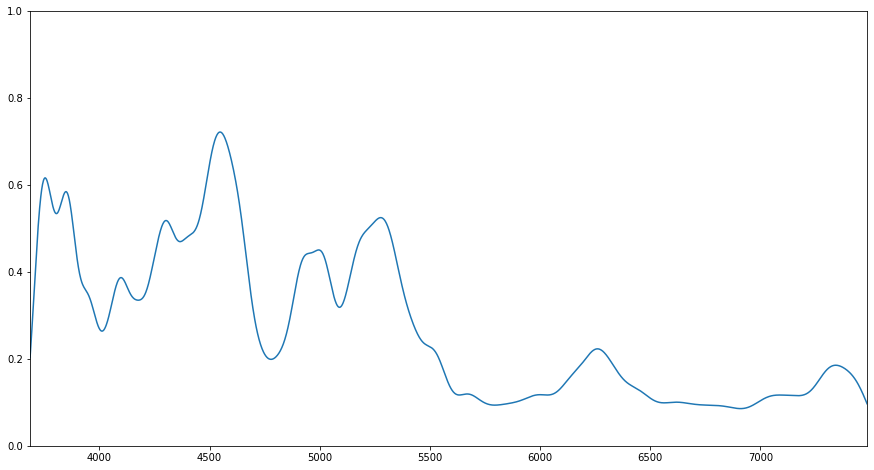

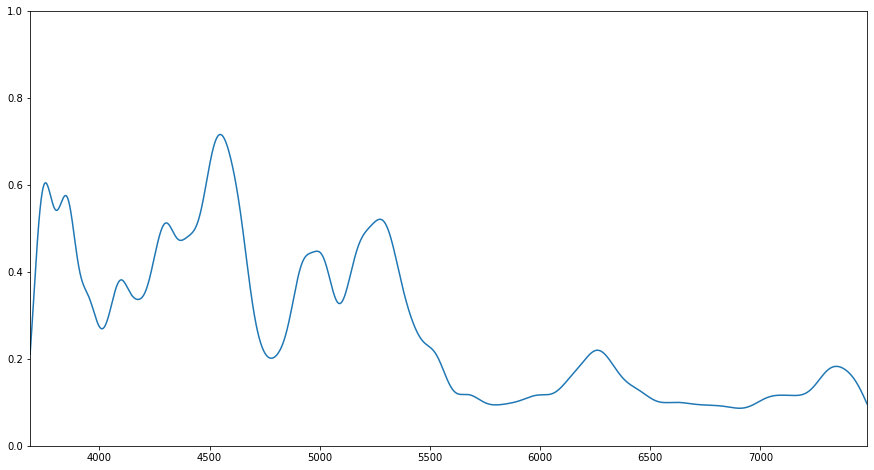

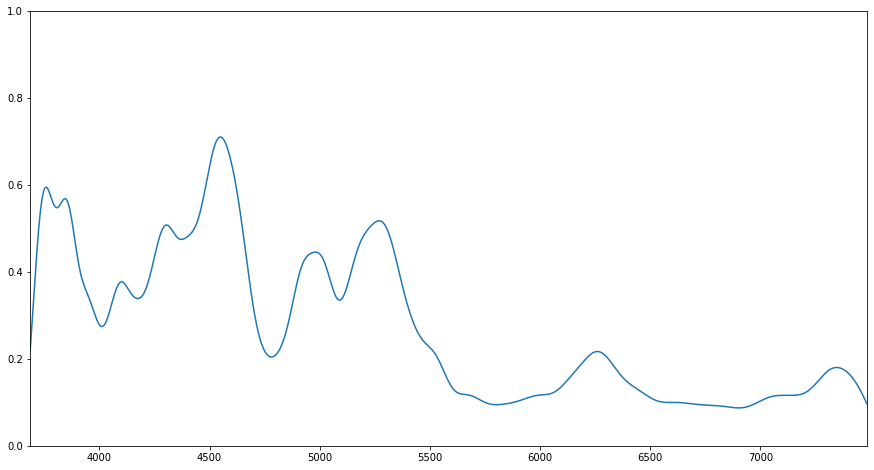

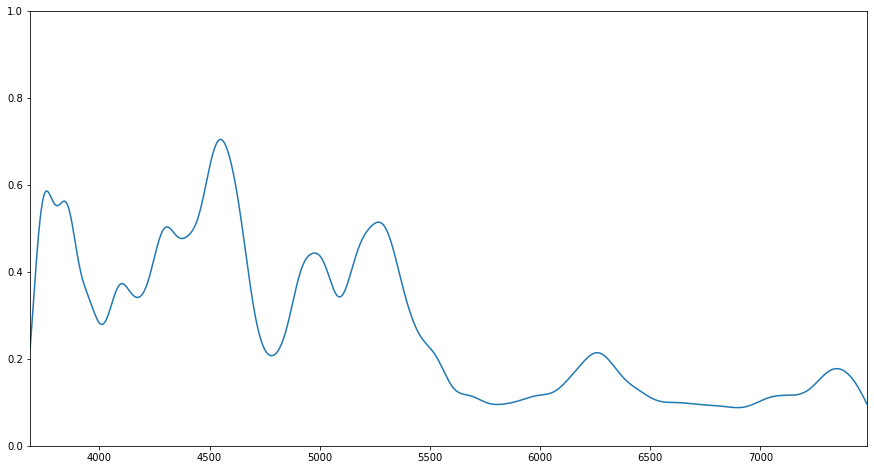

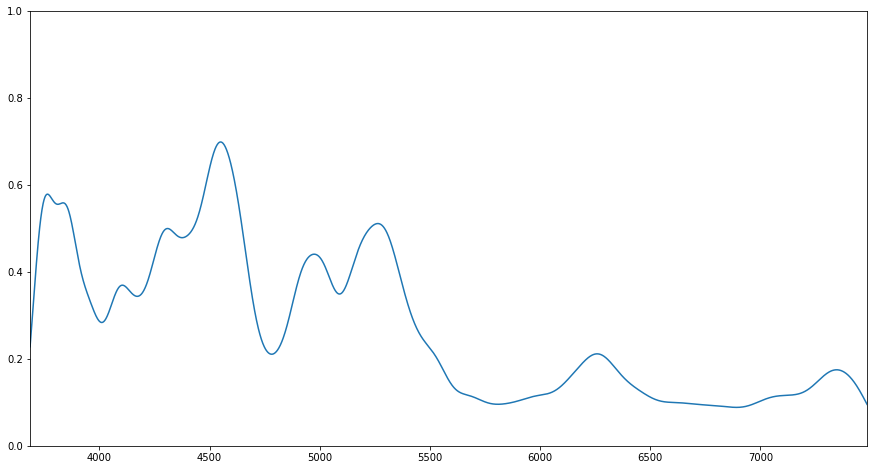

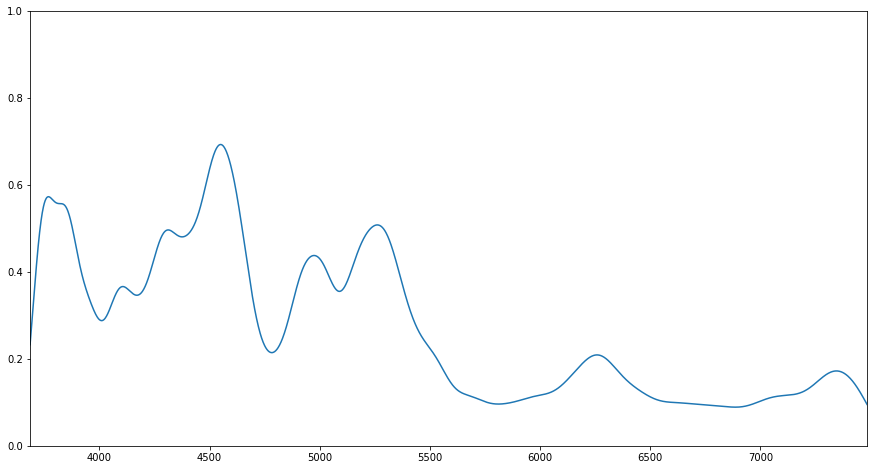

In [7]:
widths=np.linspace(1,30,num=20)

for w in widths:
    
    kernel = Gaussian1DKernel(stddev=w)
    convolved_flux = convolve(flux, kernel)

    
    plt.axis([min(wave),max(wave),0,1])
    plt.plot(wave,convolved_flux)
    plt.show()

In [10]:
# Now actually generate them

num_templates=100
numpoints=len(flux)

width_min=1
width_max=30

widths=np.linspace(width_min,width_max,num_templates)

# first column is the wavelength array
# rest of the columns are templates
templates=np.zeros(shape=(numpoints,num_templates+1))
templates[:,0]=wave

for i in range(num_templates):
    
    kernel = Gaussian1DKernel(stddev=widths[i])
    templates[:,i+1] = norm(convolve(flux, kernel)) # make sure templates are properly normalized after convolution
    
print(templates[:,1])

    
# save output
np.save('./files/fe_op_templates.npy',templates,allow_pickle=True)
    

[0.0973799  0.12532641 0.11579996 ... 0.1436743  0.09766288 0.04431707]
